# Hands-on Machine Learning, Exploratory Data Analysis, and Visualization with Python

In this session, you'll see some examples of AI and Machine Learning and interact with predictive models. Later in the notebook, we'll explore and visualize data.

Estimated time: 2.25 hrs

An entire course can be taught on any of these topics. My intention here is to:
1. Show you what is possible
2. Motivate you to learn more
3. Provide resources and example code to get your started

The content in this notebook has been curated from a variety of sources. Each will be sited appropriately. 

# *Motivational Examples*

Material from:
- [Kaggle Intro to ML](https://www.kaggle.com/dansbecker/basic-data-exploration)
- [Andrew Ng's Deep Learning course](https://www.coursera.org/specializations/deep-learning)

## Predicting Home Prices

In this example, we'll explore a structured dataset ... **ADD MORE**

In [1]:
import pandas as pd

# save filepath to variable for easier access
melbourne_file_path = 'data/melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)

# preview the data
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Let's look at some quick summary statistics of this dataset. 

In [2]:
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


The Melbourne data has some missing values (some houses for which some variables weren't recorded.) We'll learn to handle missing values in a later tutorial. We will take the simplest option for now, and drop houses from our data. 

Don't worry about this much for now, though the code is:

In [3]:
# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

Let's choose a target to predict

In [4]:
y = melbourne_data.Price

Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [5]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called X.

In [6]:
X = melbourne_data[melbourne_features]
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [7]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


### Building Your Model

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

- **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- **Fit**: Capture patterns from provided data. This is the heart of modeling.
- **Predict**: Just what it sounds like
- **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [9]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


Let's discuss this approach and remember the goal of the model. We want to predict prices of homes that are *not* in the training data. 

Adjust the features of the house below. Explore the impact of the features on the predicted price

In [10]:
new_home_features = {'Rooms': 5, 'Bathroom': 1, 'Landsize': 250, 'Lattitude': -37.80, 'Longitude': 144.99}
new_home = pd.DataFrame(new_home_features, index = [0])
print(melbourne_model.predict(new_home))

[1450000.]


### The Problem with "In-Sample" Scores

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

We will talk about this later. **It's an extremely important concept!!**

## The Happy House

For your next vacation, you decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm which that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy.

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labelled.

![Happy house members](images/house-members.png)

In [11]:
# https://www.kaggle.com/sourav13/happy-face-detection-using-cnn
# https://sandipanweb.wordpress.com/2018/01/07/classifying-a-face-image-as-happy-unhappy-and-face-recognition-using-deep-learning-convolution-neural-net-with-keras-in-python/

import h5py
import numpy as np
import random
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
print(os.listdir("data/happy-house"))

%matplotlib inline

Using TensorFlow backend.


['test_happy.h5', 'train_happy.h5']


In [12]:
trainFile = h5py.File('data/happy-house/train_happy.h5')
testFile = h5py.File('data/happy-house/test_happy.h5')

X_train_orig = np.array(trainFile['train_set_x'][:])
Y_train_orig = np.array(trainFile['train_set_y'][:])

X_test_orig = np.array(testFile['test_set_x'][:])
Y_test_orig = np.array(testFile['test_set_y'][:])

# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


Details of the "Happy" dataset:

- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures
It is now time to solve the "Happy" Challenge.

Let's see how many happy and unhappy faces are in the dataset

In [13]:
print(X_train[Y_train.ravel()==1].shape, X_train[Y_train.ravel()==0].shape)

(300, 64, 64, 3) (300, 64, 64, 3)


This is what we see:

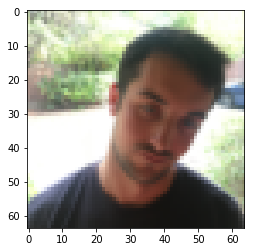

In [14]:
plt.imshow(X_train[0]) # Change the index to view different happy and unhappy faces

This is what a computer "sees"

In [15]:
print(X_train[0])

[[[0.69803922 0.74509804 0.63921569]
  [0.6745098  0.70980392 0.67843137]
  [0.7372549  0.76862745 0.72156863]
  ...
  [1.         1.         0.99607843]
  [0.99607843 1.         0.98039216]
  [0.97647059 0.99215686 0.87058824]]

 [[0.72156863 0.78823529 0.64705882]
  [0.58431373 0.60392157 0.55686275]
  [0.58431373 0.61960784 0.54509804]
  ...
  [1.         1.         0.99215686]
  [0.99607843 1.         0.98039216]
  [0.98431373 1.         0.90196078]]

 [[0.77647059 0.81176471 0.64705882]
  [0.55294118 0.57647059 0.50196078]
  [0.65882353 0.72156863 0.60392157]
  ...
  [0.99215686 1.         0.95686275]
  [0.99607843 1.         0.97254902]
  [0.99215686 1.         0.91372549]]

 ...

 [[0.30196078 0.32156863 0.34901961]
  [0.23529412 0.25098039 0.26666667]
  [0.19215686 0.20784314 0.21568627]
  ...
  [0.12156863 0.1254902  0.11764706]
  [0.18431373 0.18823529 0.18039216]
  [0.29411765 0.29411765 0.29411765]]

 [[0.26666667 0.27843137 0.29803922]
  [0.21568627 0.22745098 0.23137255]


Let's look at more images to understand the dataset. 

<Figure size 432x288 with 0 Axes>

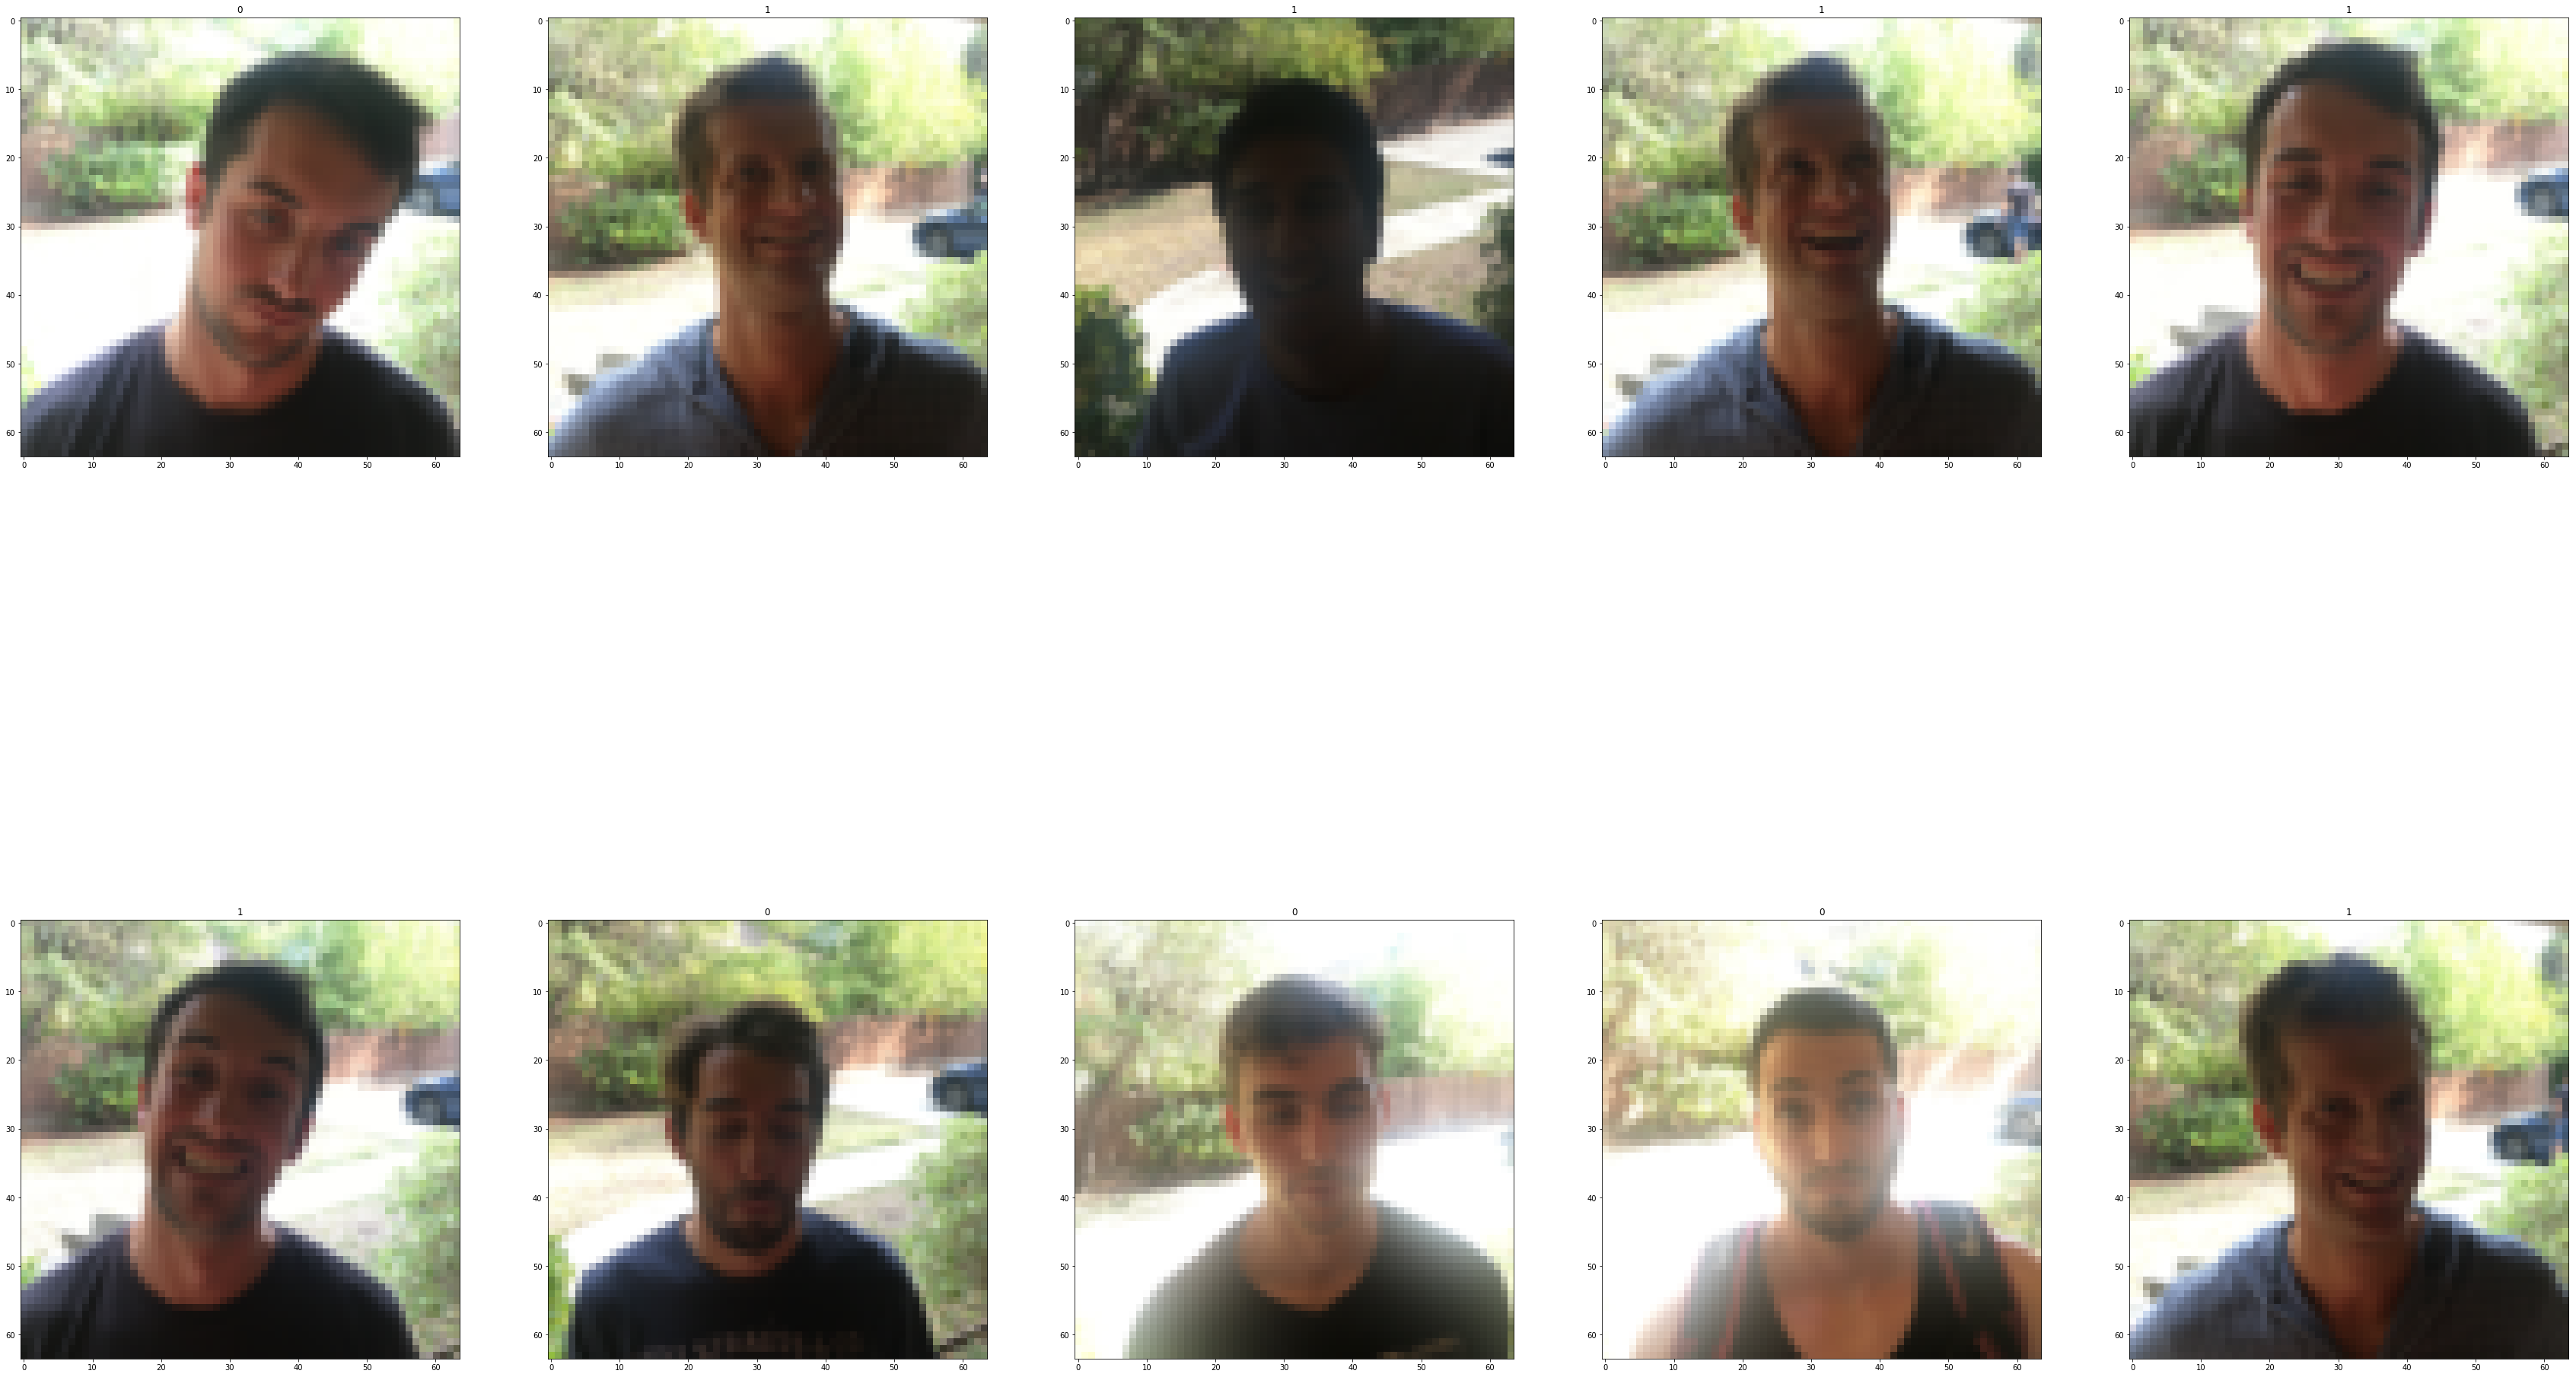

In [16]:
%run ./scripts/show_images.py
show_images(X_train[0:10], cols = 2, titles = Y_train[0:10])

Provide context here

In [17]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.

    Arguments:
    input_shape — shape of the images of the dataset

    Returns:
    model — a Model() instance in Keras
    """

    # Define the input placeholder as a tensor with shape input_shape. Think of
    # this as our input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates our Keras model instance, you’ll use this instance
    # to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

**Step 1:** Let's first create the model

In [18]:
happyModel = HappyModel((64,64,3))

**Step 2**: Compile the model to configure the learning process, keeping in view that the Happy Challenge is a binary classification problem.

In [19]:
happyModel.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Step 3**: Train the model. Choose the number of epochs and the batch size. 

*This will take 5 - 10 minutes. Let's take a quick break.*

In [31]:
random.seed(8451) # ensure reproducibility

happyModel.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
600/600 [==============================] - 25s 41ms/step - loss: 0.0743 - acc: 0.9767
Epoch 2/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0677 - acc: 0.9767
Epoch 3/10
600/600 [==============================] - 25s 42ms/step - loss: 0.0474 - acc: 0.9900
Epoch 4/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0505 - acc: 0.9850
Epoch 5/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0412 - acc: 0.9950
Epoch 6/10
600/600 [==============================] - 27s 45ms/step - loss: 0.0418 - acc: 0.9883
Epoch 7/10
600/600 [==============================] - 26s 43ms/step - loss: 0.0386 - acc: 0.9950
Epoch 8/10
600/600 [==============================] - 24s 39ms/step - loss: 0.0373 - acc: 0.9917
Epoch 9/10
600/600 [==============================] - 25s 41ms/step - loss: 0.0294 - acc: 0.9933
Epoch 10/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0770 - acc: 0.9717


**Step 4**: Test/evaluate the model

Let's see how well the model predicted the test set. 

In [32]:
preds = happyModel.predict(X_test)
results = {'truth': Y_test, 'predicted': np.reshape(np.round(preds, 3),150,1)}
results_df = pd.DataFrame(data=results)
results_df.head(10)

,truth,predicted
0,1,1.000
1,1,0.525
2,1,1.000
3,1,1.000
4,1,0.033
5,1,0.912
6,1,0.841
7,0,0.142
8,1,1.000
9,0,0.027


Visualizing the scores of the test group will help assess how well the model performs. 

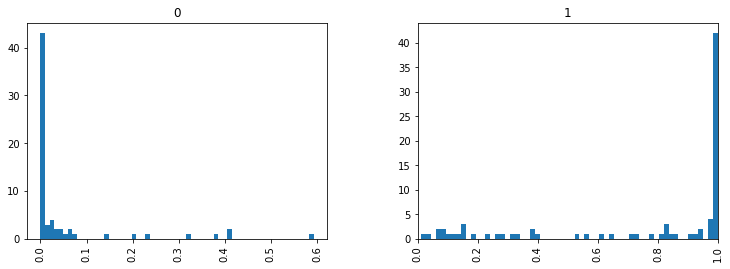

In [33]:
results_df.hist(column = 'predicted', by = 'truth', bins = 60, figsize=(12,4));
plt.xlim(0, 1);

In [34]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ('Loss = ' + str(preds[0]))
print ('Test Accuracy = ' + str(preds[1]))

150/150 [==============================] - 2s 15ms/step

Loss = 0.3311684552828471
Test Accuracy = 0.8533333325386048


The model does very well on it's test data. This is promising. Let's see how it does on images I pulled from the internet. 

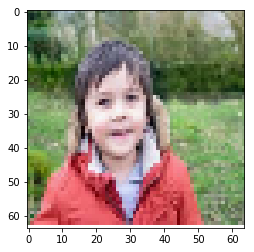

In [35]:
img_1_path = 'images/happy-in-park.png'
img_2_path = 'images/sad-in-park.png'
img_1 = image.load_img(img_1_path, target_size=(64, 64))
img_2 = image.load_img(img_2_path, target_size=(64, 64))
imshow(img_1)

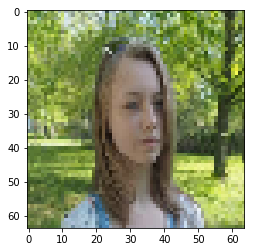

In [25]:
imshow(img_2)

Remember we normalized the training data. We have to do that to any new data, as well. 

In [36]:
x1 = image.img_to_array(img_1)/255
x2 = image.img_to_array(img_2)/255
x = np.array([x1, x2]) # combine images into 1 array

We are ready to predict

In [37]:
preds = happyModel.predict(x)
np.round(preds, 3)

array([[1.   ],
       [0.304]], dtype=float32)

It predicted the happy boy as "Happy" and the unhappy girl as "Unhappy", if we used the common threshold of 0.5. Now let's see how it does on my face.

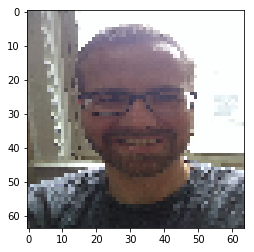

In [38]:
img_1_path = 'images/alex-happy2.jpg'
img_2_path = 'images/alex-unhappy2.jpg'
img_1 = image.load_img(img_1_path, target_size=(64, 64))
img_2 = image.load_img(img_2_path, target_size=(64, 64))
imshow(img_1)

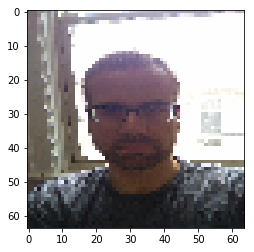

In [29]:
imshow(img_2)

In [39]:
x1 = image.img_to_array(img_1)/255
x2 = image.img_to_array(img_2)/255
x = np.array([x1, x2]) # combine images into 1 array
my_preds = happyModel.predict(x)
np.round(my_preds, 3)

array([[0.91 ],
       [0.873]], dtype=float32)

The model predicted correctly, but much less confidently than on the original test set. Let's discuss reasons why this might happen. *This is an extrememly important discussion!*

In [40]:
# let's try the model on other pictures
images = []
for img in os.listdir('images/backyard'):
    img = 'images/backyard/' + img
    img = image.load_img(img, target_size=(64, 64))
    img = image.img_to_array(img)/255
    #img = np.expand_dims(img, axis=0)
    images.append(img)
images = np.array(images)



In [41]:
my_preds_backyard = happyModel.predict(images)
np.round(my_preds_backyard, 3)

array([[1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.989],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.997],
       [0.998],
       [0.999]], dtype=float32)

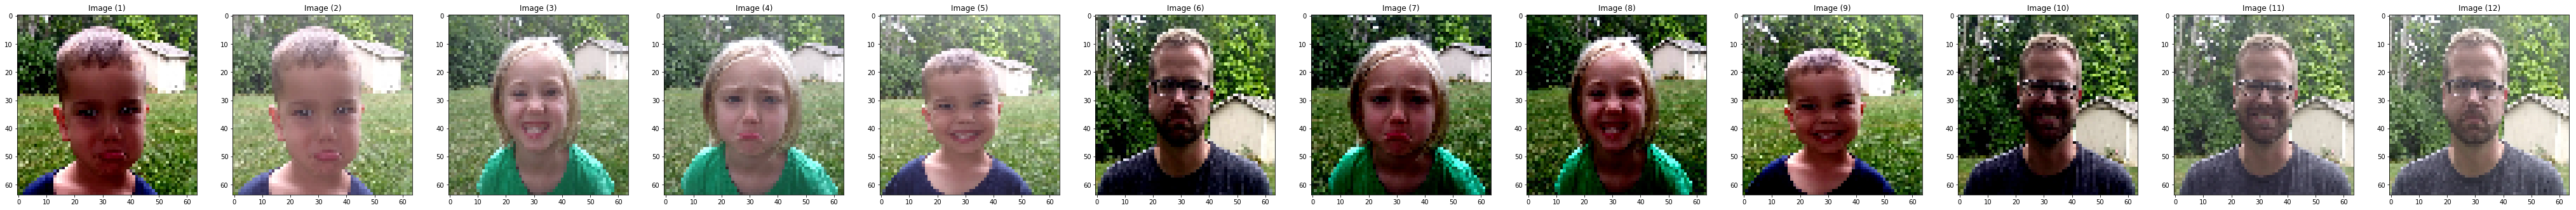

In [42]:
show_images(images)

We will explore how to understand what's going on inside the predictive model in a later bootcamp.

# Predicting Spam Texts

Data is from [Kaggle](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
Code is from [here](https://www.kaggle.com/dejavu23/sms-spam-or-ham-beginner)

*Context*
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

*Content*
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [43]:
spam_file_path = 'data/spam.csv'

# read the data and store data in DataFrame titled spam data
spam_data = pd.read_csv(spam_file_path, encoding='latin-1')
spam_data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [44]:
spam_data = spam_data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_data = spam_data.rename(columns={"v1":"label", "v2":"text"})

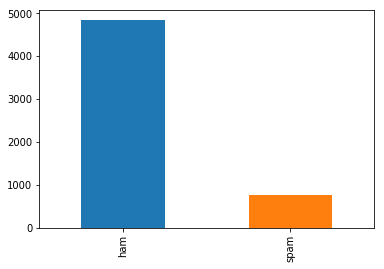

In [45]:
# Visualize data
spam_data.label.value_counts().plot.bar();

We need the target to be a number

In [46]:
spam_data['target'] = spam_data['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
spam_data.head(15)

,label,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


Let's add some features. Maybe the length of the message is predictive of whether or not it's spam.

In [47]:
spam_data['length'] = spam_data['text'].apply(len)
spam_data.head()

,label,text,target,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


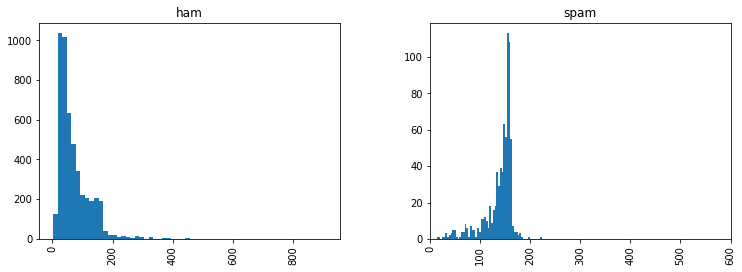

In [48]:
spam_data.hist(column = 'length', by = 'label', bins = 60, figsize=(12,4));
plt.xlim(0, 600);

Does length seem to be predictive?

In [49]:
#https://stackabuse.com/text-classification-with-python-and-scikit-learn/
    
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [84]:
X, y = spam_data.text, spam_data.target

In [85]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [89]:
# pre-processing function
from nltk.stem import WordNetLemmatizer

def pre_process_text(X):
    # X is a vector of text
    documents = []
    stemmer = WordNetLemmatizer()

    for sen in range(0, len(X)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)

        documents.append(document)
        
    return documents
    

In [91]:
documents = pre_process_text(X)

In [92]:
# Let's see what the documents look like
documents[0:9]

['go until jurong point crazy available only in bugis great world la buffet cine there got amore wat',
 'ok lar joking wif oni',
 'free entry in 2 wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate c apply 08452810075over18 s',
 'u dun say so early hor c already then say',
 'nah don think he go to usf he life around here though',
 'freemsg hey there darling it been 3 week now and no word back d like some fun you up for it still tb ok xxx std chgs to send å 1 50 to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press 9 to copy your friend callertune',
 'winner a valued network customer you have been selected to receivea å 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour only']

In [203]:
# list of text documents
vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [209]:
X_train.shape

(4457, 1500)

The next block of code may take a few minutes to run. 

In [210]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [211]:
y_pred = classifier.predict(X_test)

In [212]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[948   1]
 [ 19 147]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.89      0.94       166

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9820627802690582


In [226]:
new_data = np.array(['nah don think he go to usf he life around here though', 
'you have won free money my friend. get your prize now. it is free and free. reply yes to confirm via your mobile app. do it by 9am'])

In [227]:
new_documents = pre_process_text(new_data)
print(new_documents)

['nah don think he go to usf he life around here though', 'you have won free money my friend get your prize now it is free and free reply yes to confirm via your mobile app do it by 9am']


In [228]:
X_new = vectorizer.transform(new_documents).toarray()

In [229]:
X_new.shape

(2, 1500)

Let's see if it can predict the spam message. 

In [231]:
classifier.predict(X_new)

array([0, 1])

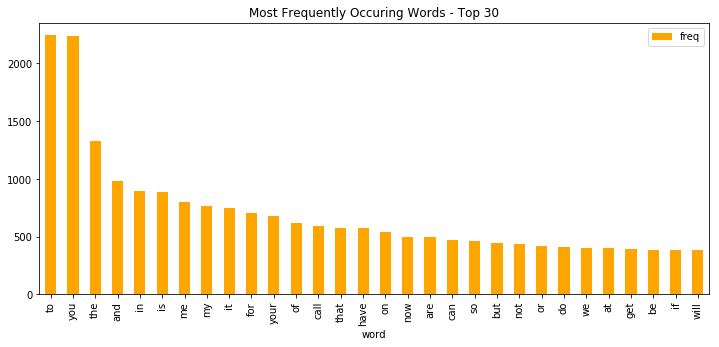

In [200]:
# https://www.kaggle.com/snjumaheshwari/spam-detection
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words = cv.fit_transform(spam_data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(12, 5), color = 'orange')
plt.title("Most Frequently Occuring Words - Top 30");

# *Exploratory Data Analysis and Visualization*

## Think About Your Data

The newest house in your data isn't that new.  A few potential explanations for this:
1. They haven't built new houses where this data was collected.
1. The data was collected a long time ago. Houses built after the data publication wouldn't show up.

If the reason is explanation #1 above, does that affect your trust in the model you build with this data? What about if it is reason #2?

How could you dig into the data to see which explanation is more plausible?

Check out this **[discussion thread](https://www.kaggle.com/learn-forum/60581)** to see what others think or to add your ideas.


# References
1. [Kaggle Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)